In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [250]:
file= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [251]:
file.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [252]:
df= pd.DataFrame(file)

In [253]:
df.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [254]:
df.shape

(158, 12)

In [255]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [256]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

## EDA Process

#### Null Values

In [257]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

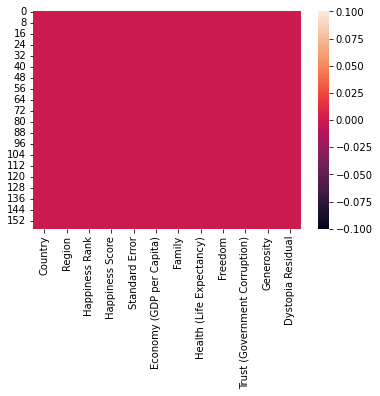

In [258]:
sns.heatmap(df.isnull())


#### Label Encoding

In [259]:
df1=df.iloc[:,:2]

In [260]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [261]:
l1=df['Region'].unique()

In [262]:
l1.sort()

In [263]:
print(l1)

['Australia and New Zealand' 'Central and Eastern Europe' 'Eastern Asia'
 'Latin America and Caribbean' 'Middle East and Northern Africa'
 'North America' 'Southeastern Asia' 'Southern Asia' 'Sub-Saharan Africa'
 'Western Europe']


In [264]:
df['Region'].nunique()

10

In [265]:
#for i in range(0,10):
#    for s in l1:
 #       print(i ,'for', s)

In [266]:
from sklearn.preprocessing import LabelEncoder

In [267]:
LE= LabelEncoder()

In [268]:
df['Region']=LE.fit_transform(df['Region'])

In [269]:
i=0
while(i<len(l1)):
    print(i,'for',l1[i],'AFTER ENCODING')
    i=i+1

0 for Australia and New Zealand AFTER ENCODING
1 for Central and Eastern Europe AFTER ENCODING
2 for Eastern Asia AFTER ENCODING
3 for Latin America and Caribbean AFTER ENCODING
4 for Middle East and Northern Africa AFTER ENCODING
5 for North America AFTER ENCODING
6 for Southeastern Asia AFTER ENCODING
7 for Southern Asia AFTER ENCODING
8 for Sub-Saharan Africa AFTER ENCODING
9 for Western Europe AFTER ENCODING


In [270]:
df['Country']=LE.fit_transform(df['Country'])

In [271]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [272]:
df1

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
153,Rwanda,Sub-Saharan Africa
154,Benin,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
156,Burundi,Sub-Saharan Africa


#### Data Visualization

In [273]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<AxesSubplot:xlabel='Region', ylabel='count'>

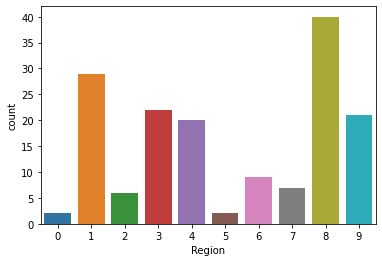

In [274]:
sns.countplot(df['Region'])

<AxesSubplot:xlabel='Family', ylabel='Economy (GDP per Capita)'>

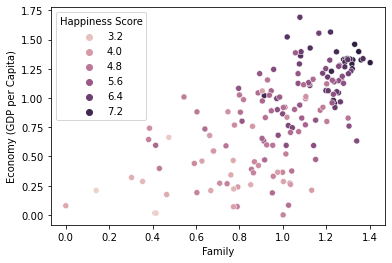

In [275]:
sns.scatterplot(df['Family'],df['Economy (GDP per Capita)'],hue=df['Happiness Score'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia Residual'>

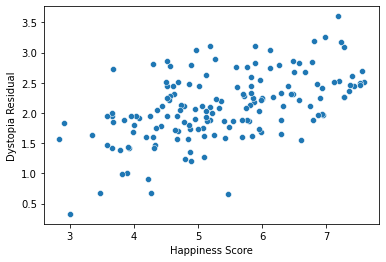

In [276]:
sns.scatterplot(df['Happiness Score'],df['Dystopia Residual'])

In [277]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<AxesSubplot:xlabel='Happiness Score', ylabel='Generosity'>

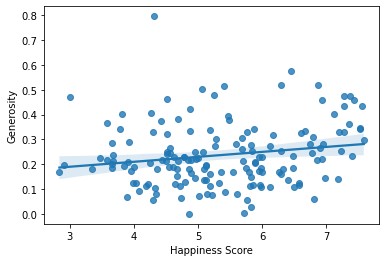

In [278]:
sns.regplot(df['Happiness Score'],df['Generosity'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Family'>

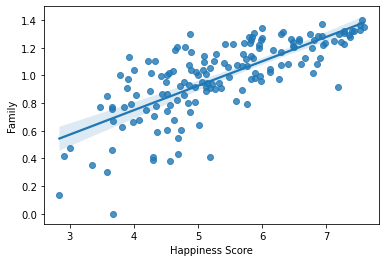

In [279]:
sns.regplot(df['Happiness Score'],df['Family'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Standard Error'>

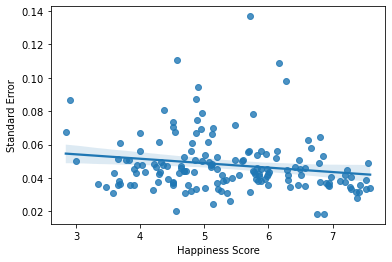

In [280]:
sns.regplot(df['Happiness Score'],df['Standard Error'])

In [281]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<AxesSubplot:xlabel='Region', ylabel='Density'>

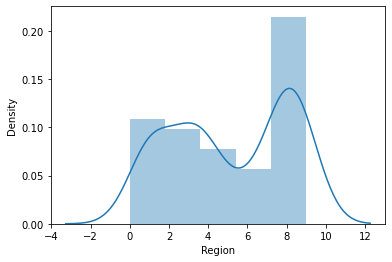

In [282]:
sns.distplot(df['Region'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

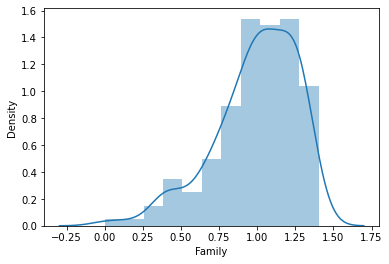

In [283]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

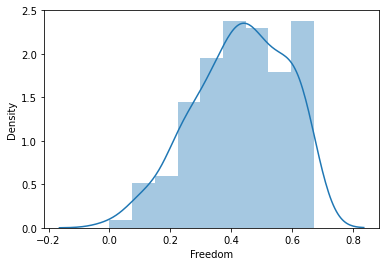

In [284]:
sns.distplot(df['Freedom'])

In [285]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

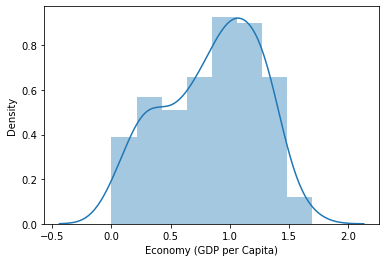

In [286]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Trust (Government Corruption)'>

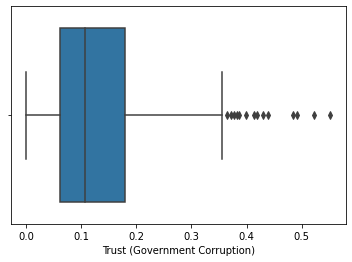

In [287]:
sns.boxplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Dystopia Residual'>

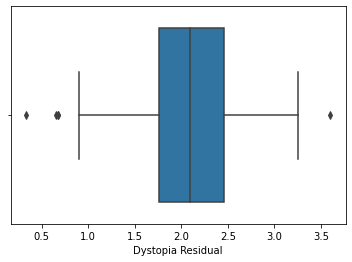

In [288]:
sns.boxplot(df['Dystopia Residual'])

<AxesSubplot:xlabel='Generosity'>

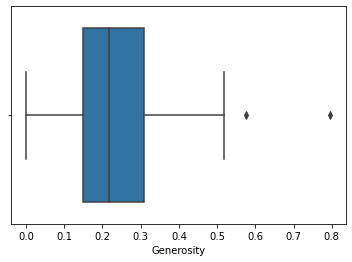

In [289]:
sns.boxplot(df['Generosity'])

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

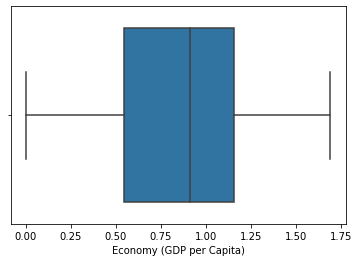

In [291]:
sns.boxplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Standard Error'>

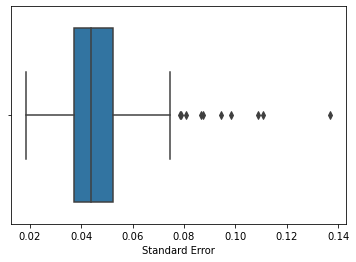

In [292]:
sns.boxplot(df['Standard Error'])

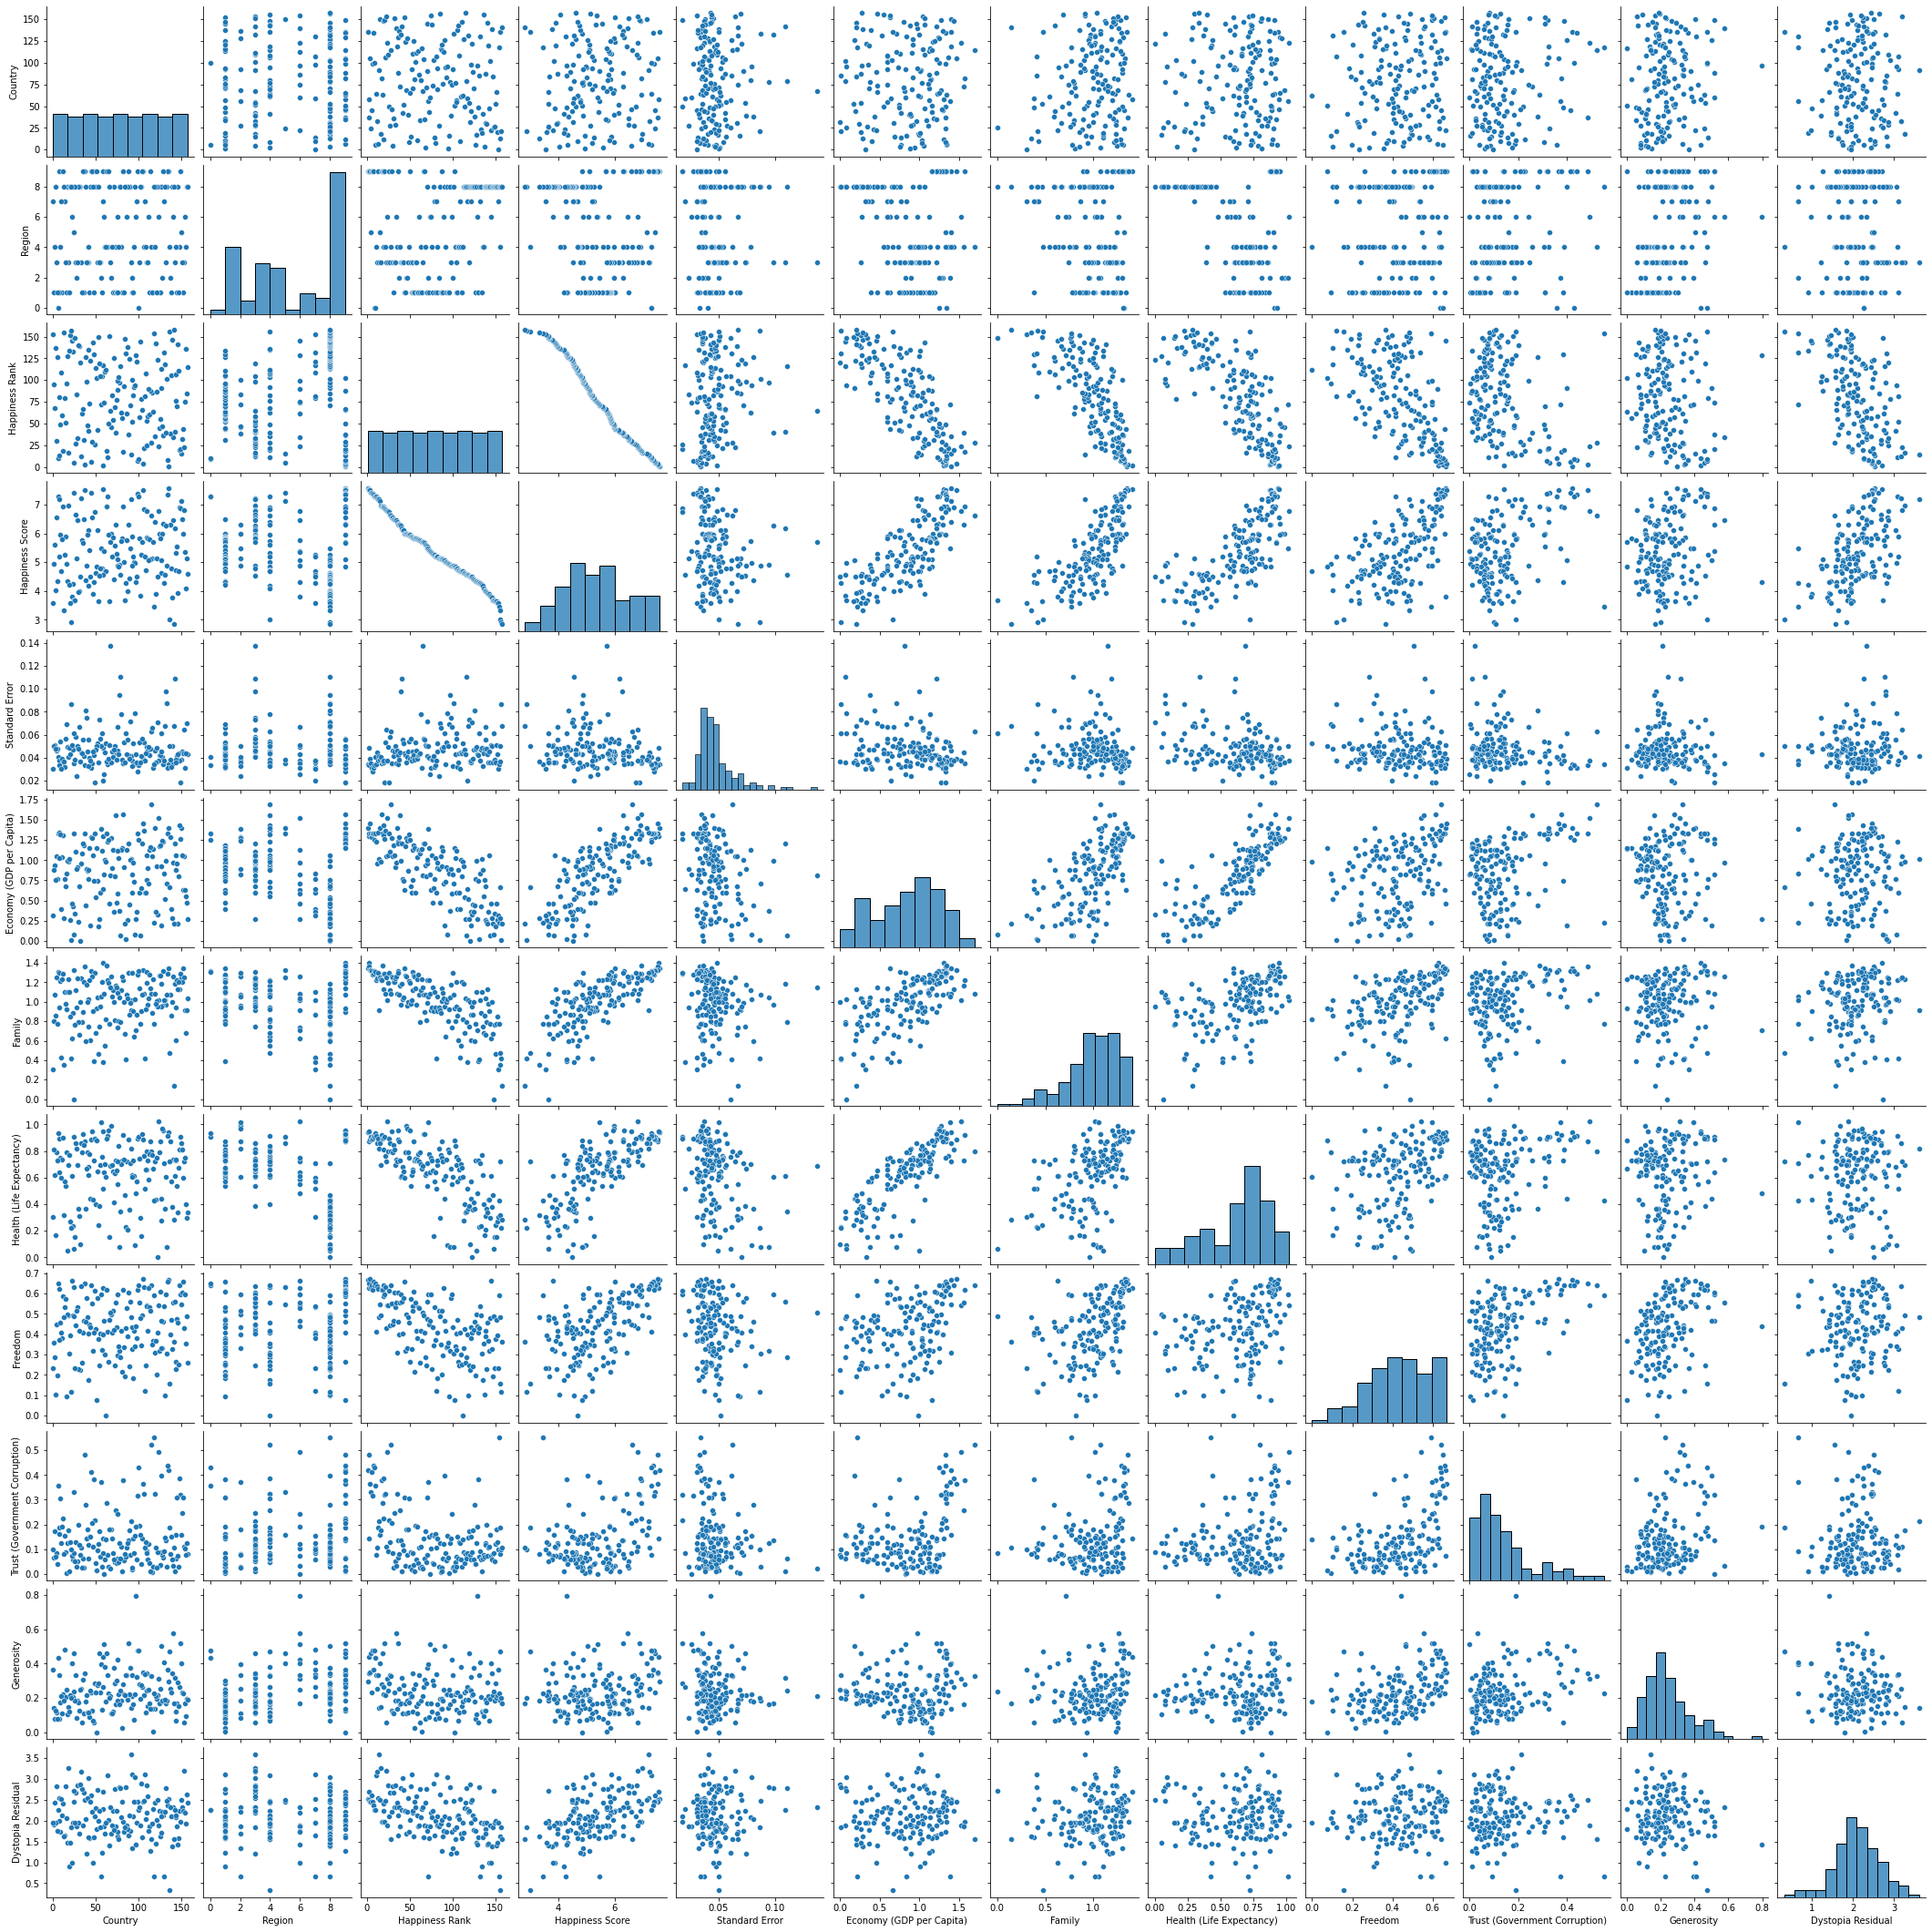

In [293]:
sns.pairplot(df)

#### Summary Stats

In [419]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [295]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#### Skewness

In [296]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [297]:
#df['height']=np.abs(np.log(df['height']))

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

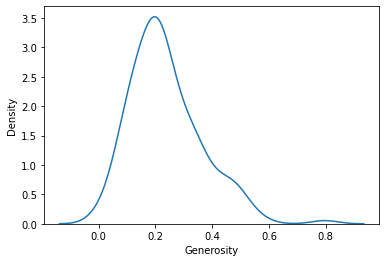

In [298]:
sns.kdeplot(df['Generosity'])

#### Removing outliers

In [299]:
from scipy.stats import zscore

In [300]:
z= np.abs(zscore(df))

In [301]:
df.shape

(158, 12)

In [302]:
newdf=df[(z<3).all(axis=1)]

In [304]:
newdf.shape

(149, 12)

In [305]:
newdf

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


#### Correlation Test

In [307]:
newdf.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.007739,-0.125380,0.120109,0.003898,0.039300,0.202403,0.036875,0.091495,0.062379,0.096685,0.048980
Region,0.007739,1.000000,0.184520,-0.145850,-0.013860,-0.224928,-0.127749,-0.334531,0.101335,0.167550,0.305791,-0.059494
Happiness Rank,-0.125380,0.184520,1.000000,-0.992921,0.212085,-0.773651,-0.720359,-0.736758,-0.571089,-0.445743,-0.225626,-0.526680
Happiness Score,0.120109,-0.145850,-0.992921,1.000000,-0.230252,0.773577,0.720868,0.729191,0.585066,0.477692,0.250903,0.528334
Standard Error,0.003898,-0.013860,0.212085,-0.230252,1.000000,-0.251749,-0.137879,-0.356444,-0.186465,-0.140156,-0.131970,0.045722
Economy (GDP per Capita),0.039300,-0.224928,-0.773651,0.773577,-0.251749,1.000000,0.628589,0.817470,0.376780,0.342269,0.020730,0.026936
Family,0.202403,-0.127749,-0.720359,0.720868,-0.137879,0.628589,1.000000,0.503890,0.474229,0.258646,0.154011,0.118062
Health (Life Expectancy),0.036875,-0.334531,-0.736758,0.729191,-0.356444,0.817470,0.503890,1.000000,0.382595,0.270605,0.129328,0.031212
Freedom,0.091495,0.101335,-0.571089,0.585066,-0.186465,0.376780,0.474229,0.382595,1.000000,0.506373,0.428718,0.058596
Trust (Government Corruption),0.062379,0.167550,-0.445743,0.477692,-0.140156,0.342269,0.258646,0.270605,0.506373,1.000000,0.296450,0.078080


<AxesSubplot:>

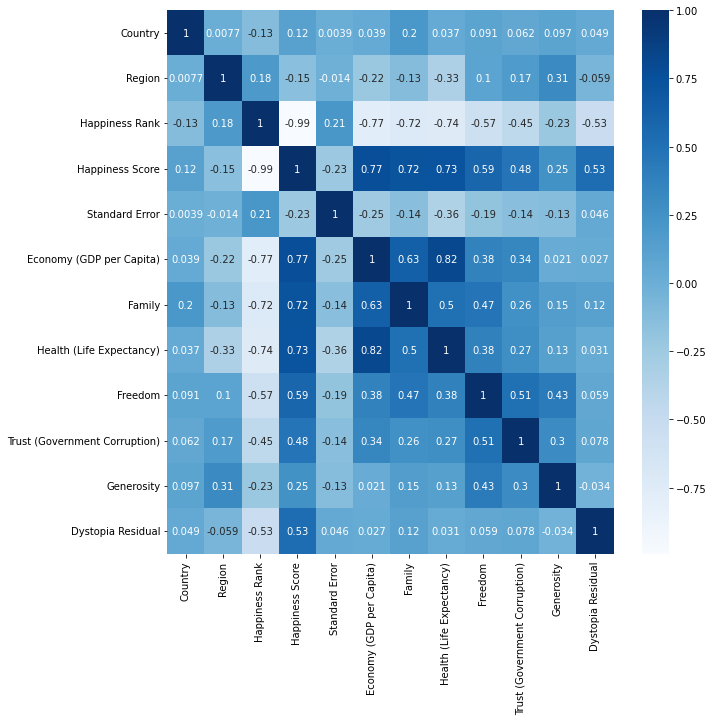

In [308]:
plt.figure(figsize=(10,10))
sns.heatmap(newdf.corr(),cmap='Blues',annot=True)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Standard Error'>

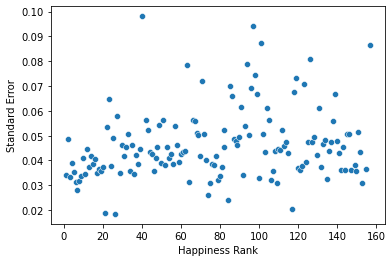

In [309]:
sns.scatterplot(newdf['Happiness Rank'],newdf['Standard Error'])

#### VIF

In [347]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [348]:
x=newdf.drop('Happiness Score',axis=1)

In [349]:
x.shape

(149, 11)

In [350]:
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [351]:
x.shape[1]

11

In [352]:
y=newdf.iloc[:,3]

In [353]:
y.shape

(149,)

In [354]:
newdf

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [355]:
def vif_cal():
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['columns']=x.columns
    print(vif)

In [356]:
vif_cal()

          vif                        columns
0    4.080724                        Country
1    5.541325                         Region
2    5.732283                 Happiness Rank
3   13.745754                 Standard Error
4   28.217616       Economy (GDP per Capita)
5   32.447513                         Family
6   28.154014       Health (Life Expectancy)
7   16.980265                        Freedom
8    3.890405  Trust (Government Corruption)
9    7.046492                     Generosity
10  14.825046              Dystopia Residual


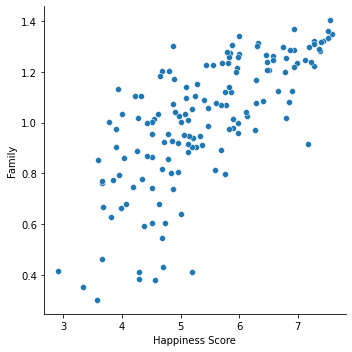

In [357]:
sns.relplot(newdf['Happiness Score'],df['Family'])

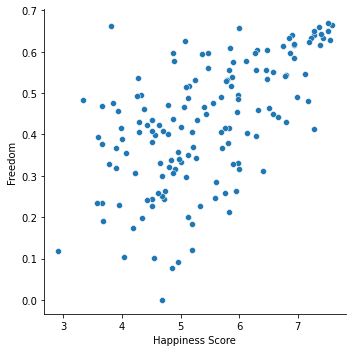

In [358]:
sns.relplot(newdf['Happiness Score'],df['Freedom'])

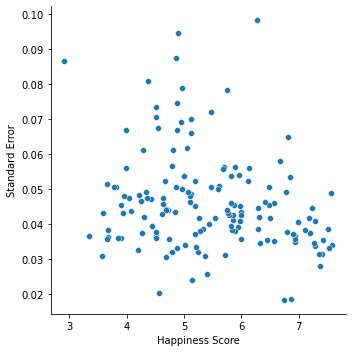

In [359]:
sns.relplot(newdf['Happiness Score'],df['Standard Error'])

### Data Cleansing & Feature Engineering

In [360]:
#df.drop(['Standard Error'],axis=1,inplace=True)

In [361]:
#df.head()

#### Making Normal Distribution

In [362]:
#preprocessing = labelencoder & standard scalar

In [363]:
from sklearn.preprocessing import StandardScaler

In [364]:
ss = StandardScaler()

In [365]:
x=ss.fit_transform(x)

In [367]:
x

array([[ 1.26826032,  1.29683671, -1.71390512, ...,  2.47225453,
         0.54630526,  0.7568764 ],
       [-0.41741515,  1.29683671, -1.69153548, ...,  0.00924715,
         1.71389767,  1.10929978],
       [-0.87714482,  1.29683671, -1.66916583, ...,  3.03674718,
         0.91963022,  0.70850719],
       ...,
       [-1.68714472,  0.63509469,  1.68628086, ..., -0.38241996,
         1.11805063, -0.32213507],
       [-1.40255016,  0.9659657 ,  1.73102015, ..., -0.53365337,
        -0.40922585, -0.9307015 ],
       [-1.22741505,  0.9659657 ,  1.77575944, ..., -0.35206708,
        -0.28645792, -0.54943602]])

In [368]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [369]:
from sklearn.model_selection import train_test_split

In [370]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [371]:
x_test.shape

(45, 11)

In [372]:
y_test.shape

(45,)

In [373]:
y_train

84     5.129
137    3.995
148    3.667
78     5.253
111    4.677
       ...  
74     5.360
109    4.686
14     7.119
95     4.949
105    4.786
Name: Happiness Score, Length: 104, dtype: float64

##### Linear Reg

In [374]:
from sklearn.linear_model import LinearRegression

In [375]:
lr=LinearRegression()

In [376]:
lr.fit(x_train,y_train)

LinearRegression()

In [377]:
lr.score(x_train,y_train)

0.9999999377518592

In [378]:
lr.intercept_

5.429614341132989

In [379]:
# coef means if x increase by 1 then how many y will increase
lr.coef_

array([-2.46306145e-05, -2.80840126e-05, -2.79510238e-04, -1.56231305e-05,
        3.86632000e-01,  2.50962208e-01,  2.44966979e-01,  1.50281890e-01,
        1.12995994e-01,  1.19465676e-01,  5.23738162e-01])

In [380]:
col=df.columns

In [381]:
list(zip(lr.coef_,col))

[(-2.4630614507454406e-05, 'Country'),
 (-2.8084012561916907e-05, 'Region'),
 (-0.0002795102376742036, 'Happiness Rank'),
 (-1.5623130485079423e-05, 'Happiness Score'),
 (0.3866320000098471, 'Standard Error'),
 (0.25096220793606333, 'Economy (GDP per Capita)'),
 (0.24496697934121048, 'Family'),
 (0.15028188970891346, 'Health (Life Expectancy)'),
 (0.11299599403879462, 'Freedom'),
 (0.11946567595717886, 'Trust (Government Corruption)'),
 (0.5237381619799558, 'Generosity')]

In [382]:
pred= lr.predict(x_test)

In [383]:
pred

array([5.28638189, 6.93730343, 4.51225554, 5.19235116, 5.21210566,
       6.4767512 , 5.60469193, 3.78078424, 5.47393831, 5.12417043,
       4.64230301, 7.19973262, 6.29812426, 7.28402971, 6.90134725,
       5.81261521, 3.90375602, 5.42867498, 5.82408278, 4.03310334,
       6.50506975, 4.33221937, 6.66963978, 4.25202034, 4.21852492,
       3.65518694, 4.63344991, 4.78792598, 5.9752745 , 6.48509495,
       6.81008913, 6.98255459, 5.5886244 , 7.2255941 , 5.99510714,
       4.69399643, 5.85528737, 6.57501582, 7.4268554 , 6.45458407,
       4.41925112, 5.09762619, 5.07329282, 6.94619805, 7.2775508 ])

In [384]:
predicted_df=pd.DataFrame(pred)

In [385]:
predicted_df.head()

,0
0,5.286382
1,6.937303
2,4.512256
3,5.192351
4,5.212106


In [386]:
lr.score(x_test,y_test)

0.9999999363107198

#### Errors / Metrics

In [387]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [388]:
print('mean squared error=',mean_squared_error(y_test,pred))
print('root mean squared error=',np.sqrt(mean_squared_error(y_test,pred)))
print('mean abs error=',mean_absolute_error(y_test,pred))
print('r2 score/performence=',r2_score(y_test,pred))

mean squared error= 7.60157775142992e-08
root mean squared error= 0.0002757095890865952
mean abs error= 0.00023876245843983154
r2 score/performence= 0.9999999363107198


In [389]:
def pred(values):
    values=np.array(values)
    values=values.reshape(1,-1)
    result=lr.predict(values)
    print('predicted score is',result)

In [393]:
newdf.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [396]:
values=[24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176]
#135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738

In [397]:
pred(values)

predicted score is [7.96521812]


#### Regularization

In [398]:
# to improve accuracy of model

In [399]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [400]:
lasso= Lasso(alpha=0.0001)

In [401]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [402]:
lasso.score(x_train,y_train)

0.9999993415656007

In [403]:
lasso_pred=lasso.predict(x_test)

In [404]:
r2_score(y_test,lasso_pred)

0.9999993113144822

In [405]:
ridge=Ridge(alpha=0.1)

In [406]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [407]:
ridge.score(x_train,y_train)

0.9999853386224533

In [408]:
ridge_pred=ridge.predict(x_test)

In [409]:
r2_score(y_test,ridge_pred)

0.9999859614233374

#### Using More algos

In [410]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [411]:
knn= KNeighborsRegressor()
dtc= DecisionTreeRegressor()
svr = SVR()

In [412]:
models = [knn,dtc,svr]

In [413]:
for i in models:
    i.fit(x_train,y_train)
    regressor_pred=i.predict(x_test)
    print('score of',i,i.score(x_train,y_train))
    print('mean squared error of',i,mean_squared_error(y_test,regressor_pred))
    print('root mean squared error of',i,np.sqrt(mean_squared_error(y_test,regressor_pred)))
    print('mean abs errorof',i,mean_absolute_error(y_test,regressor_pred))
    print('r2 score/performence of',i,r2_score(y_test,regressor_pred))
    print('\n')

score of KNeighborsRegressor() 0.9317901579819038
mean squared error of KNeighborsRegressor() 0.13398575377777763
root mean squared error of KNeighborsRegressor() 0.3660406449805508
mean abs errorof KNeighborsRegressor() 0.3063955555555554
r2 score/performence of KNeighborsRegressor() 0.8877409862424896


score of DecisionTreeRegressor() 1.0
mean squared error of DecisionTreeRegressor() 0.009998111111111107
root mean squared error of DecisionTreeRegressor() 0.09999055510952576
mean abs errorof DecisionTreeRegressor() 0.07091111111111115
r2 score/performence of DecisionTreeRegressor() 0.9916231534985961


score of SVR() 0.9848366310169634
mean squared error of SVR() 0.05104526746599624
root mean squared error of SVR() 0.22593199743727369
mean abs errorof SVR() 0.16981717165576057
r2 score/performence of SVR() 0.9572320845974038




#### Ensemble methods 

In [414]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor

In [415]:
RF=RandomForestRegressor(random_state=42)
GB=GradientBoostingRegressor()
ADA=AdaBoostRegressor()

In [416]:
ens_algo=[RF,GB,ADA]

for i in ens_algo:
    i.fit(x_train,y_train)
    ens_algo_pred=i.predict(x_test)
    print('score of',i,i.score(x_train,y_train))
    print('mean squared error of',i,mean_squared_error(y_test,regressor_pred))
    print('root mean squared error of',i,np.sqrt(mean_squared_error(y_test,regressor_pred)))
    print('mean abs errorof',i,mean_absolute_error(y_test,regressor_pred))
    print('r2 score/performence of',i,r2_score(y_test,regressor_pred))
    print('\n')

score of RandomForestRegressor(random_state=42) 0.9991459212688971
mean squared error of RandomForestRegressor(random_state=42) 0.05104526746599624
root mean squared error of RandomForestRegressor(random_state=42) 0.22593199743727369
mean abs errorof RandomForestRegressor(random_state=42) 0.16981717165576057
r2 score/performence of RandomForestRegressor(random_state=42) 0.9572320845974038


score of GradientBoostingRegressor() 0.9999993308999607
mean squared error of GradientBoostingRegressor() 0.05104526746599624
root mean squared error of GradientBoostingRegressor() 0.22593199743727369
mean abs errorof GradientBoostingRegressor() 0.16981717165576057
r2 score/performence of GradientBoostingRegressor() 0.9572320845974038


score of AdaBoostRegressor() 0.9974595693357136
mean squared error of AdaBoostRegressor() 0.05104526746599624
root mean squared error of AdaBoostRegressor() 0.22593199743727369
mean abs errorof AdaBoostRegressor() 0.16981717165576057
r2 score/performence of AdaBoostR

#### Exporting Decision Tree Model

In [417]:
import joblib

In [418]:
joblib.dump(lr,'happiness.obj')

['happiness.obj']